In [12]:
# load module
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# data load
customers_data=pd.read_csv(r"D:\Blinkit Dataset DA\Excel Data\blinkit_customers.csv")
orders_data=pd.read_csv(r"D:\Blinkit Dataset DA\Excel Data\blinkit_orders.csv")


In [14]:
# show data colunm name
customers_data.columns

Index(['customer_id', 'customer_name', 'email', 'phone', 'address', 'area',
       'pincode', 'registration_date', 'customer_segment', 'total_orders',
       'avg_order_value'],
      dtype='object')

In [15]:
# Q1.Who are Blinkit's most valuable customers? 
customers_data.sort_values( by = "total_orders",ascending=False,inplace=True)
print("Top 5 Most Valuable Customers")
for no,name in enumerate(customers_data[:5]["customer_name"].values):
    print(no+1,name)

Top 5 Most Valuable Customers
1 Thomas Walia
2 Udarsh Rao
3 Ojas Gour
4 Mitesh Sehgal
5 Ayush Tripathi


In [16]:
orders_data['order_date']=orders_data['order_date'].astype("datetime64[ns]")

In [17]:
orders_data.head(1)

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
0,1961864118,30065862,2024-07-17 08:34:00,17-07-2024 08:52,17-07-2024 08:47,On Time,3197.07,Cash,63230,4771


In [18]:
orders_data['orders_date_hour']=orders_data['order_date'].dt.hour
orders_data['orders_date_day_name']=orders_data['order_date'].dt.day_name()

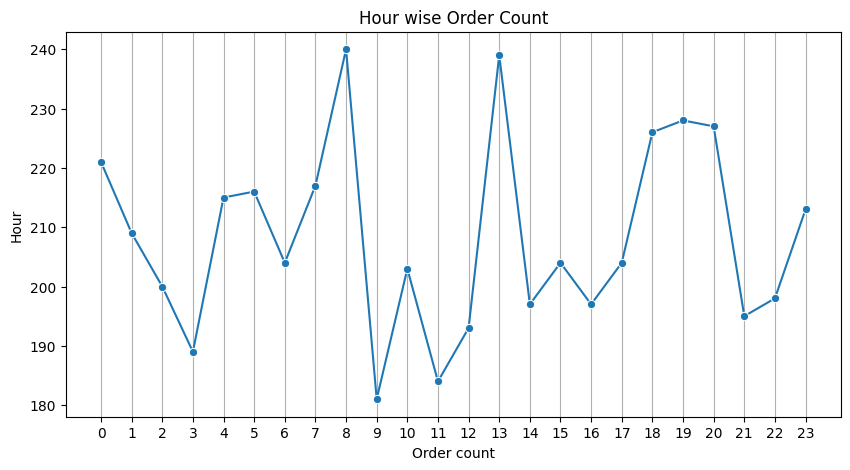

In [57]:
# Q.2 What are the common trends in customer purchase behaviour?
temp = orders_data['orders_date_hour'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.lineplot(x=temp.index, y=temp.values, marker="o")
plt.xticks(range(24))
plt.xlabel("Order count")
plt.ylabel("Hour")
plt.title("Hour wise Order Count")
plt.grid(axis="x")
plt.savefig("Hour wise Order Count.jpg")
plt.show()

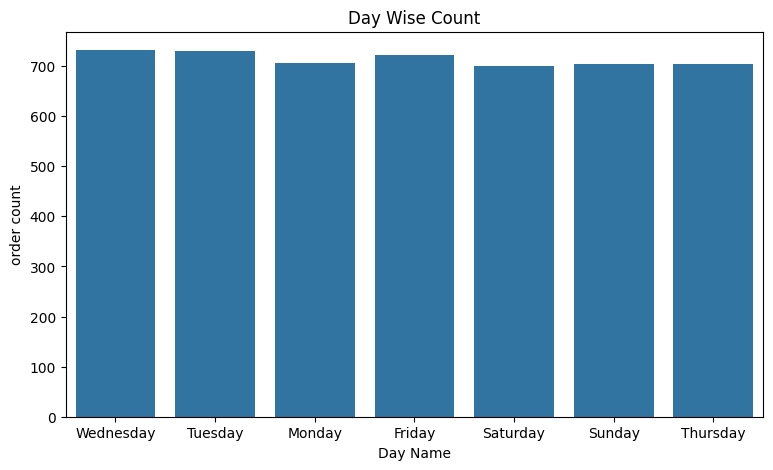

In [20]:
# Q.2 What are the common trends in customer purchase behaviour?
plt.figure(figsize=(9,5))
sns.countplot(x="orders_date_day_name",data=orders_data)
plt.ylabel("order count")
plt.xlabel("Day Name")
plt.title("Day Wise Count")
plt.show()          


In [21]:
order_items=pd.read_csv(r"D:\Blinkit Dataset DA\Excel Data\blinkit_order_items.csv")
products=pd.read_csv(r"D:\Blinkit Dataset DA\Excel Data\blinkit_products.csv")

In [22]:
# Q 3.Which products frequently go out of stock or have excess inventory?
temp_join = pd.merge(products,order_items,on="product_id",how="outer")
for i,j in enumerate((temp_join['quantity']==temp_join["max_stock_level"]).values):
    if j :
     print(i)
print("No any product out of stock")

No any product out of stock


In [23]:
order_items.columns

Index(['order_id', 'product_id', 'quantity', 'unit_price'], dtype='object')

In [24]:
products.columns


Index(['product_id', 'product_name', 'category', 'brand', 'price', 'mrp',
       'margin_percentage', 'shelf_life_days', 'min_stock_level',
       'max_stock_level'],
      dtype='object')

In [25]:
# Q.4 Top 1 selling product
temp_join = pd.merge(products,order_items,on="product_id",how="outer")
temp_join.sort_values( by = "quantity",ascending=False,inplace=True)
print("Top 1 selling product")
for no,name in enumerate(temp_join[:1]["product_name"].values):
    print(no+1,name)

Top 1 selling product
1 Pulses


In [26]:
marketing_performance=pd.read_csv(r"D:\Blinkit Dataset DA\Excel Data\blinkit_marketing_performance.csv")

In [27]:
marketing_performance.columns

Index(['campaign_id', 'campaign_name', 'date', 'target_audience', 'channel',
       'impressions', 'clicks', 'conversions', 'spend', 'revenue_generated',
       'roas'],
      dtype='object')

In [28]:
# Q.5Which marketing channels or campaigns bring the most high value customers?     
marketing_performance.sort_values(by=["channel", "campaign_name"],ascending=False,inplace=True)
print("Marketing channels or campaigns bringing the most high value customers")
print(marketing_performance[["channel", "campaign_name"]].head(5))

Marketing channels or campaigns bringing the most high value customers
          channel    campaign_name
109  Social Media  Weekend Special
127  Social Media  Weekend Special
154  Social Media  Weekend Special
163  Social Media  Weekend Special
190  Social Media  Weekend Special


In [29]:
marketing_performance= pd.read_csv(r"D:\Blinkit Dataset DA\Excel Data\blinkit_marketing_performance.csv")

In [30]:
marketing_performance.columns

Index(['campaign_id', 'campaign_name', 'date', 'target_audience', 'channel',
       'impressions', 'clicks', 'conversions', 'spend', 'revenue_generated',
       'roas'],
      dtype='object')

In [31]:
customers_data.columns

Index(['customer_id', 'customer_name', 'email', 'phone', 'address', 'area',
       'pincode', 'registration_date', 'customer_segment', 'total_orders',
       'avg_order_value'],
      dtype='object')

In [32]:
# 9.What is the ROI of marketing campaigns across cities? 
# temp_data = pd.merge(customers_data,marketing_performance,on="customer_id",how="outer")
# temp_data = temp_data[temp_data['campaign_name']=='area']



In [33]:
customer_feedback = pd.read_csv(r"D:\Blinkit Dataset DA\Excel Data\blinkit_customer_feedback.csv")

In [34]:
# Q.7 What are the top issues mentioned by customers in feedback?      
top_issue= customer_feedback['feedback_category'].value_counts().head(5)
print("Top issues mentioned by customers:")
print(top_issue)

Top issues mentioned by customers:
feedback_category
Delivery            1271
Customer Service    1266
Product Quality     1250
App Experience      1213
Name: count, dtype: int64


In [35]:
# Q.8 Is there a link between negative feedback and specific products, delivery times, or order experience?      
# Filter negative feedback
negative_feedback = customer_feedback[customer_feedback['sentiment'] == 'Negative']
# Count negative feedback by category
negative_link = negative_feedback['feedback_category'].value_counts()
print("Link between negative feedback and specific issues:")
print(negative_link)

Link between negative feedback and specific issues:
feedback_category
Product Quality     432
Customer Service    417
Delivery            405
App Experience      388
Name: count, dtype: int64


In [36]:
customer_feedback.columns

Index(['feedback_id', 'order_id', 'customer_id', 'rating', 'feedback_text',
       'feedback_category', 'sentiment', 'feedback_date'],
      dtype='object')

In [37]:
orders_data.columns

Index(['order_id', 'customer_id', 'order_date', 'promised_delivery_time',
       'actual_delivery_time', 'delivery_status', 'order_total',
       'payment_method', 'delivery_partner_id', 'store_id', 'orders_date_hour',
       'orders_date_day_name'],
      dtype='object')

In [38]:
# Q.9 Which customer segments contribute the most to revenue and have the highest frequency of orders?   
plt.figure(figsize=(6,4))




<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

In [39]:
customers_data.columns

Index(['customer_id', 'customer_name', 'email', 'phone', 'address', 'area',
       'pincode', 'registration_date', 'customer_segment', 'total_orders',
       'avg_order_value'],
      dtype='object')

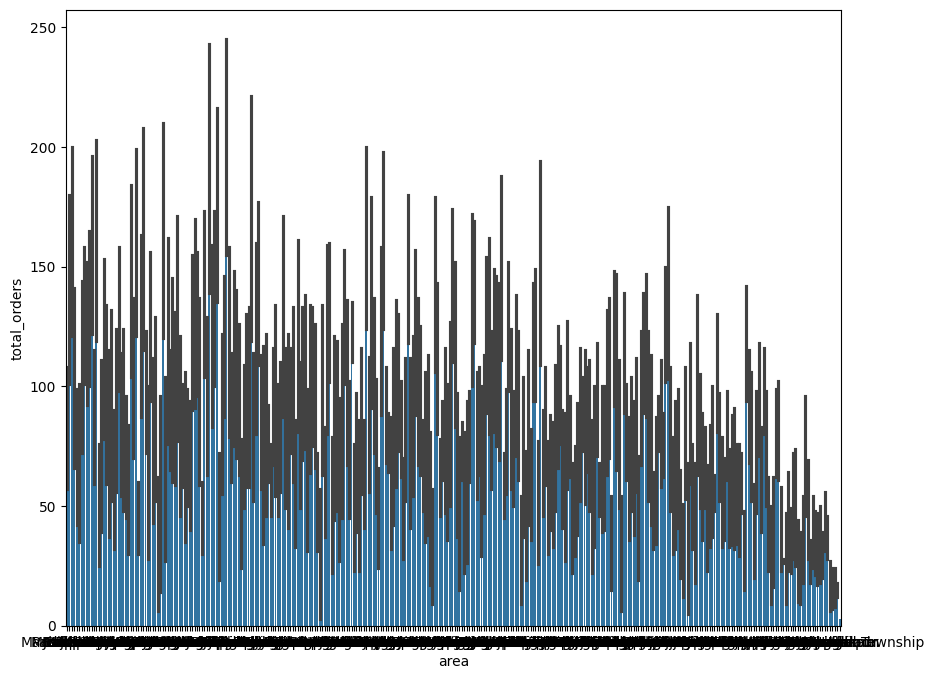

In [40]:
# Q.10 What are the differences in order behaviour across cities or PIN codes? 
plt.figure(figsize=(10,8))
sns.barplot(x= "area",y= "total_orders",data=customers_data, estimator="sum")
# for no,name in enumerate(customers_data[:1]["total_orders"],["area"].values):
    # print(no+1,name)
plt.show() 

In [41]:
# Which cities or zones experience the highest delivery delays? 
temp_data = pd.merge(customers_data,orders_data,on="customer_id",how="outer")
temp_data = temp_data[temp_data['delivery_status']=='Significantly Delayed']

In [42]:
temp_data['area'].value_counts()[:5]

area
Orai           7
Agra           6
Bangalore      6
Gandhinagar    6
Ghaziabad      5
Name: count, dtype: int64

In [43]:
marketing_performance.columns

Index(['campaign_id', 'campaign_name', 'date', 'target_audience', 'channel',
       'impressions', 'clicks', 'conversions', 'spend', 'revenue_generated',
       'roas'],
      dtype='object')

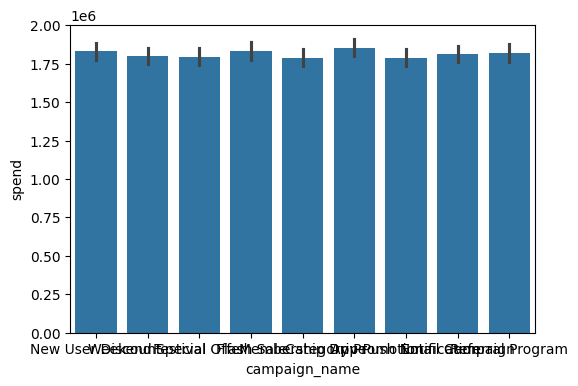

In [44]:
# 14.	What is the cost per acquisition (CPA) vs revenue per customer for each campaign? 
plt.figure(figsize=(6,4))
sns.barplot(x = "campaign_name", y = "spend",data= marketing_performance,estimator="sum",)
plt.show()

In [45]:
products=pd.read_csv(r"D:\Blinkit Dataset DA\Excel Data\blinkit_products.csv")


In [46]:
products.columns

Index(['product_id', 'product_name', 'category', 'brand', 'price', 'mrp',
       'margin_percentage', 'shelf_life_days', 'min_stock_level',
       'max_stock_level'],
      dtype='object')

In [47]:
orders_data.columns

Index(['order_id', 'customer_id', 'order_date', 'promised_delivery_time',
       'actual_delivery_time', 'delivery_status', 'order_total',
       'payment_method', 'delivery_partner_id', 'store_id', 'orders_date_hour',
       'orders_date_day_name'],
      dtype='object')

In [48]:

# Q.15 Which product categories drive the most revenue vs. volume? 
# temp_data = pd.merge(products,orders_data,on='order_id',how="outer")
# temp_data = temp_data[temp_data['revenue']=='Quality']


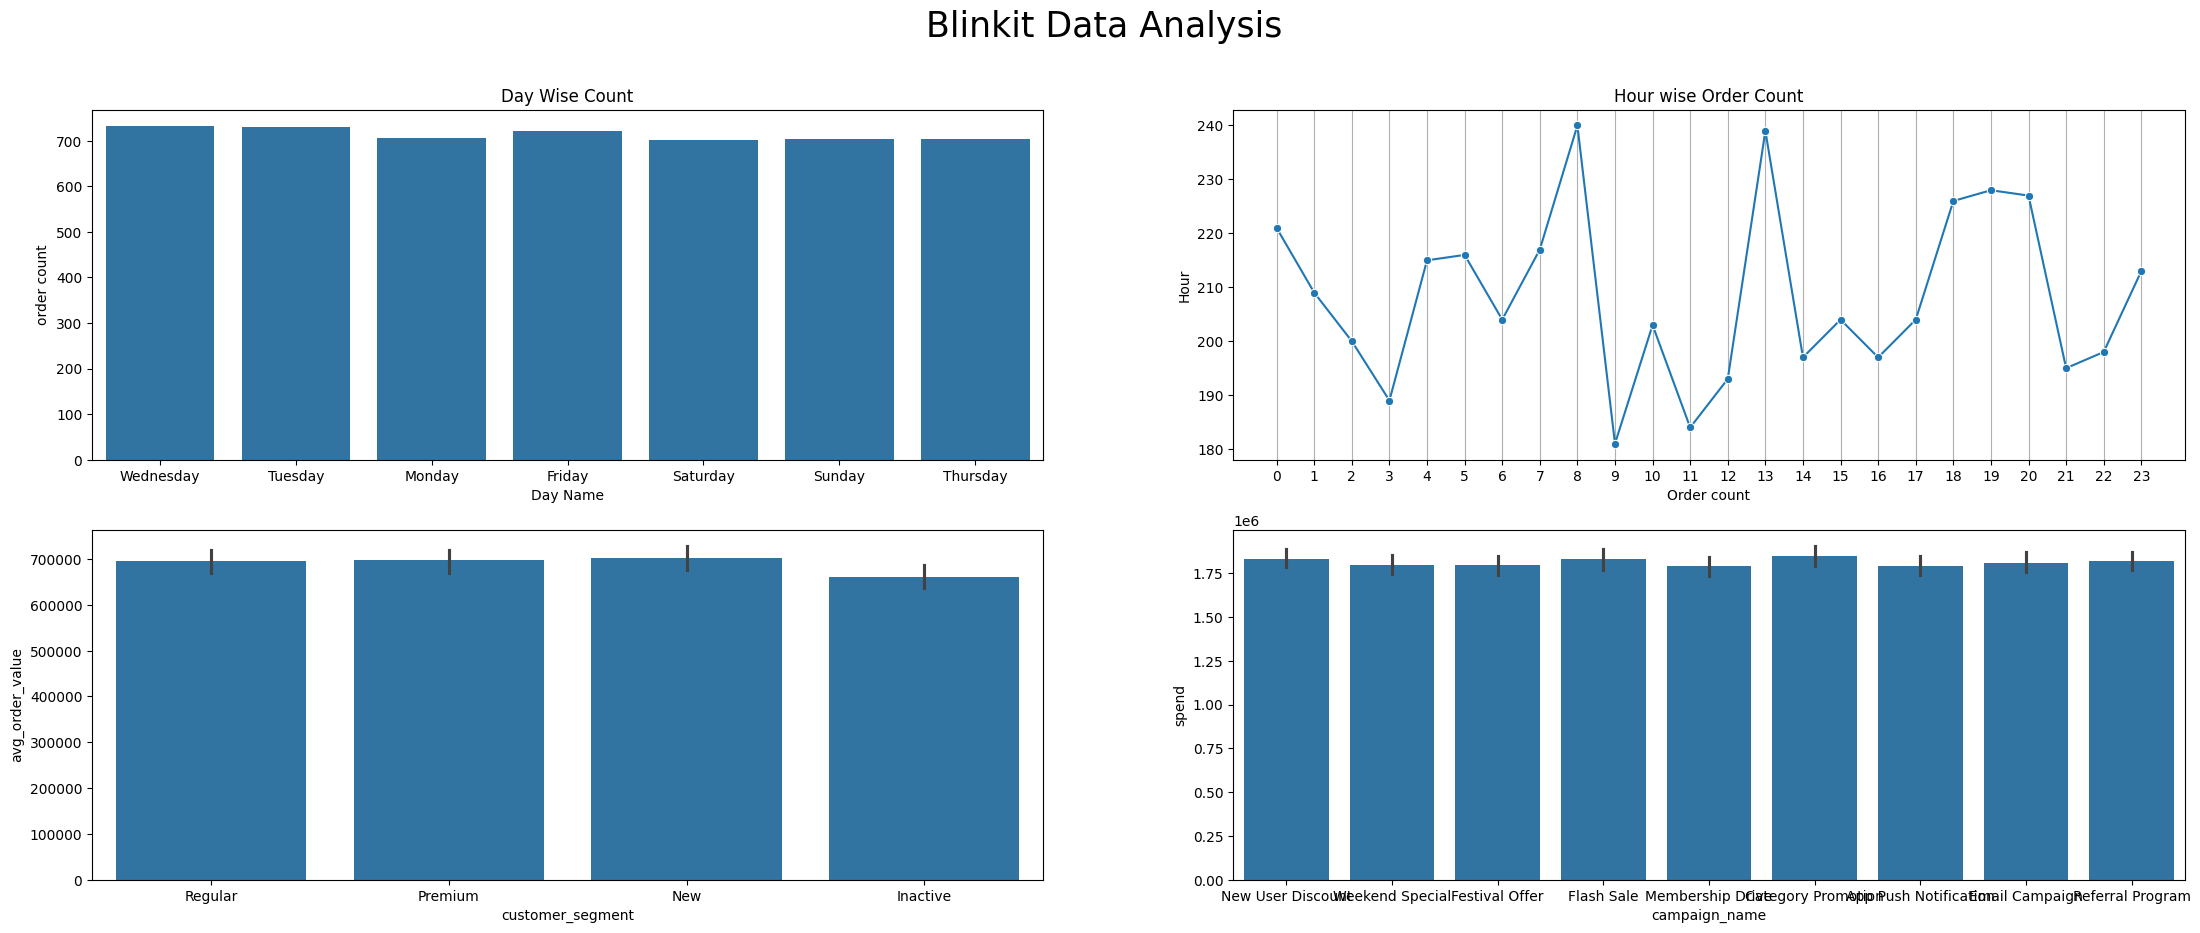

In [56]:
# final dashbord
plt.figure(figsize=(27,10))

plt.subplot(2,2,1) # no of col , no of row , ghaph no
sns.countplot(x="orders_date_day_name",data=orders_data)
plt.ylabel("order count")
plt.xlabel("Day Name")
plt.title("Day Wise Count")

plt.subplot(2,2,2) # no of col , no of row , ghaph no
sns.lineplot(x=temp.index, y=temp.values, marker="o")
plt.xticks(range(24))
plt.xlabel("Order count")
plt.ylabel("Hour")
plt.title("Hour wise Order Count")
plt.grid(axis="x")

plt.subplot(2,2,3) # no of col , no of row , ghaph no
sns.barplot(x= "customer_segment",y= "avg_order_value",data=customers_data, estimator="sum")

plt.subplot(2,2,4) # no of col , no of row , ghaph no
sns.barplot(x = "campaign_name", y = "spend",data= marketing_performance,estimator="sum",)
plt.suptitle("Blinkit Data Analysis",fontsize = 25)
plt.savefig("Blinkit Data Analysis.jpg")
plt.show()